In [20]:
import os
import warnings
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [9]:
train_path = os.path.join("data", "FIFA_train.csv")
test_path = os.path.join("data", "FIFA_test.csv")
submission_path = os.path.join("data", "submission.csv")

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
submission = pd.read_csv(submission_path)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [11]:
train[["age", "stat_overall", "stat_potential"]] = train[["age", "stat_overall", "stat_potential"]].astype(np.int32)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int32  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int32  
 9   stat_potential    8932 non-null   int32  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int32(3), int64(1), object(5)
memory usage: 732.8+ KB


In [15]:
# 기술통계량 확인
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,8932.0,7.966776e+03,4.844429e+03,0.0,3751.75,7696.5,12082.25,16948.0
age,8932.0,2.520914e+01,4.635515e+00,16.0,21.00,25.0,28.00,40.0
reputation,8932.0,1.130878e+00,4.237919e-01,1.0,1.00,1.0,1.00,5.0
stat_overall,8932.0,6.709113e+01,6.854910e+00,47.0,63.00,67.0,72.00,94.0
stat_potential,8932.0,7.199720e+01,5.988147e+00,48.0,68.00,72.0,76.00,94.0
stat_skill_moves,8932.0,2.401702e+00,7.760476e-01,1.0,2.00,2.0,3.00,5.0
value,8932.0,2.778673e+06,5.840982e+06,10000.0,375000.00,825000.0,2600000.00,110500000.0


In [18]:
train[["continent", "contract_until", "prefer_foot", "position" ,"name"]].describe()

,continent,contract_until,prefer_foot,position,name
count,8932,8932,8932,8932,8932
unique,5,17,2,4,8932
top,europe,2019,right,MF,D. Bronn
freq,5322,2366,6837,3428,1


In [19]:
train.sort_values(by="value", ascending=False)[:50]

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
17,30,Isco,26,europe,2022,ST,right,3.0,88,91,4.0,73500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
14,26,M. Salah,26,africa,2023,MF,left,3.0,88,89,4.0,69500000.0
18,32,Coutinho,26,south america,2023,ST,right,3.0,88,89,5.0,69500000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
26,45,P. Pogba,25,europe,2021,MF,right,4.0,87,91,5.0,64000000.0
7,14,N. Kanté,27,europe,2023,MF,right,3.0,89,90,2.0,63000000.0
27,47,R. Lukaku,25,europe,2022,ST,left,3.0,87,89,3.0,62500000.0


In [26]:
plt.style.use("fivethirtyeight")

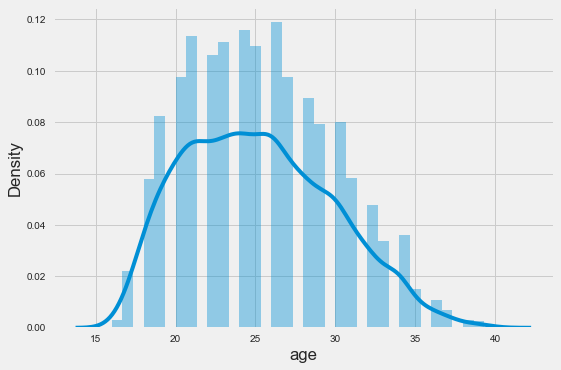

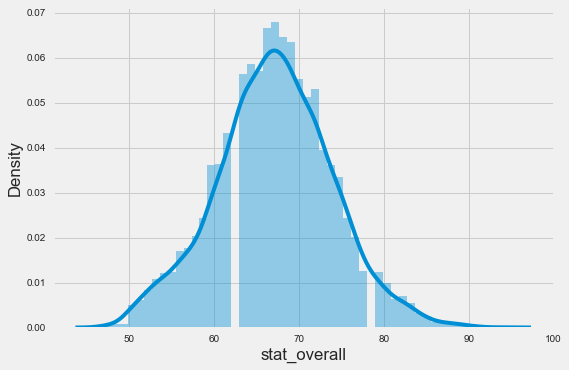

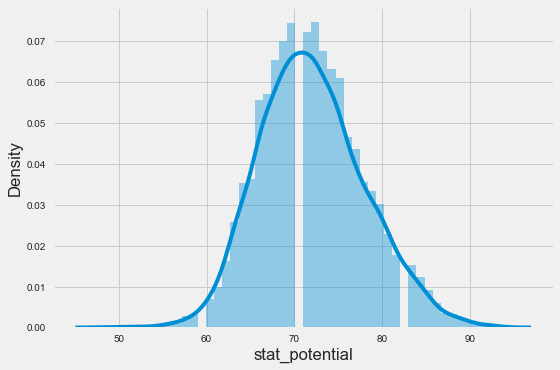

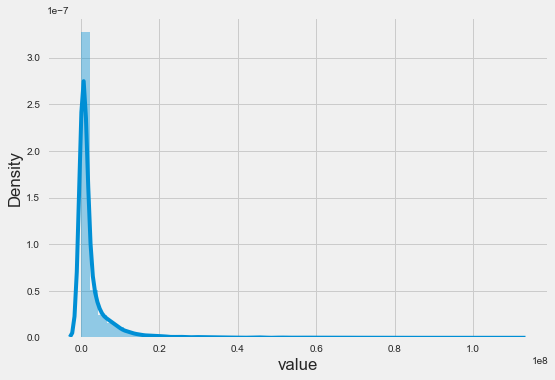

In [31]:
# distribution 
cols = ["age", "stat_overall", "stat_potential", "value"]
for col in cols:
    sns.distplot(train[col])
    plt.show()

In [28]:
train.head(1)

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0


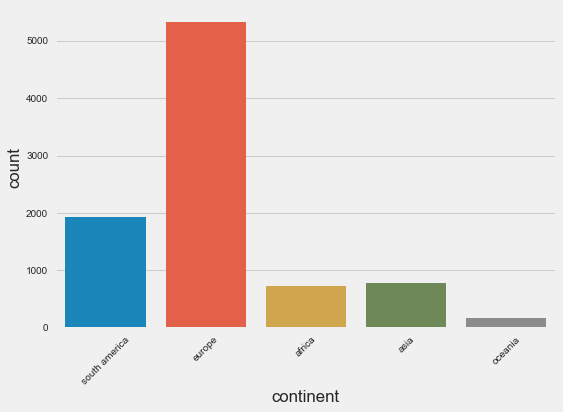

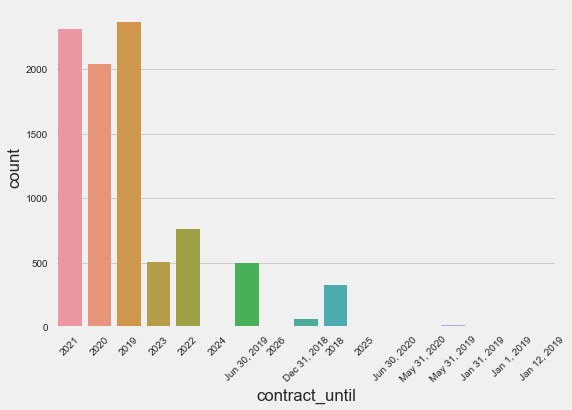

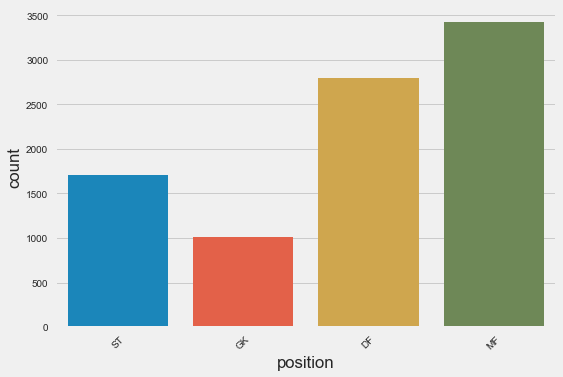

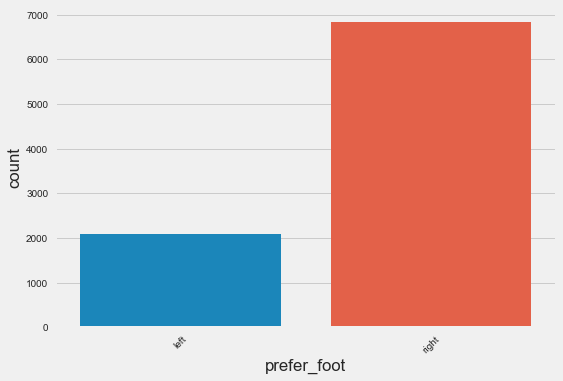

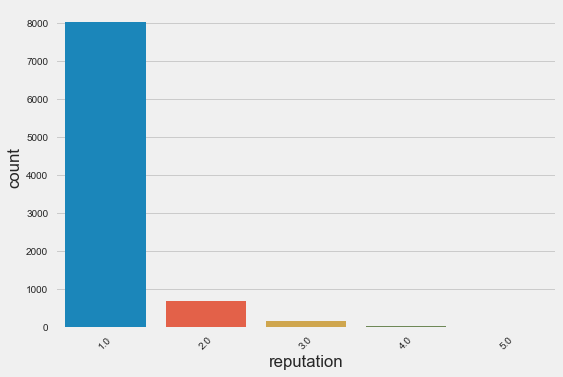

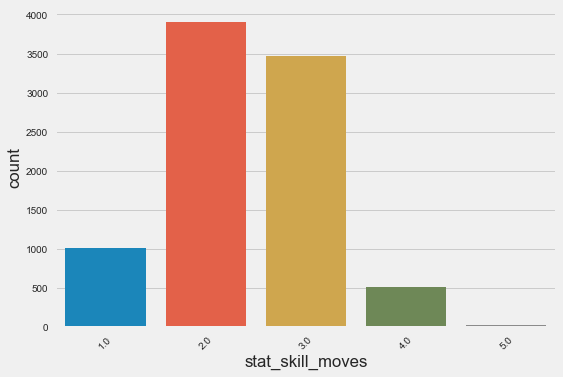

In [30]:
# countplot
cols = ["continent", "contract_until" ,"position" ,"prefer_foot" ,"reputation" ,"stat_skill_moves"]
for col in cols:
    sns.countplot(train[col])
    plt.xticks(rotation=45)
    plt.show()

In [33]:
pd.set_option("precision", 100)
train.groupby("reputation")["value"].mean()

reputation
1.0     1690091.71449962561018764972686767578125
2.0     8639220.96317280456423759460449218750000
3.0    22014830.50847457721829414367675781250000
4.0    33429032.25806451588869094848632812500000
5.0    60625000.00000000000000000000000000000000
Name: value, dtype: float64

In [61]:
train.groupby(["reputation","stat_skill_moves"])["value"].mean().reset_index()

,reputation,stat_skill_moves,value
0,1.0,1.0,1041406.250000000000000000000000000000000
1,1.0,2.0,982351.270957274246029555797576904296875
2,1.0,3.0,2252813.620071684475988149642944335937500
3,1.0,4.0,6376045.016077170148491859436035156250000
4,1.0,5.0,6050000.000000000000000000000000000000000
5,2.0,1.0,7947000.000000000000000000000000000000000
6,2.0,2.0,6837245.508982036262750625610351562500000
7,2.0,3.0,7242123.493975903838872909545898437500000
8,2.0,4.0,13671126.760563381016254425048828125000000
9,2.0,5.0,17470000.000000000000000000000000000000000


# 피처 엔지니어링

In [37]:
train["contract_until"] = train["contract_until"].map(lambda x : x[-4:])

In [38]:
train["contract_until"].unique()

array(['2021', '2020', '2019', '2023', '2022', '2024', '2026', '2018',
       '2025'], dtype=object)

In [39]:
train["contract_until"] = train["contract_until"].astype(np.int32)

In [42]:
train["contract_until"] = train["contract_until"] - 2018

In [43]:
train["contract_until"]

0       3
1       2
2       3
3       2
4       3
       ..
8927    1
8928    2
8929    3
8930    3
8931    2
Name: contract_until, Length: 8932, dtype: int32

<AxesSubplot:xlabel='contract_until', ylabel='count'>

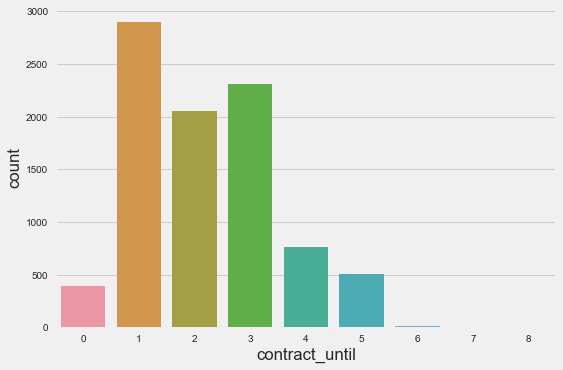

In [44]:
sns.countplot(train["contract_until"])

In [46]:
train["stat_potent"] = train["stat_potential"] - train["stat_overall"]

In [48]:
train["retire_age"] = 35 - train["age"]

In [50]:
train["retire_age"].min()

-5

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
import lightgbm as lgb